In [23]:
import pandas as pd
from matplotlib import pyplot as plt
from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost:5432/sql-challenge')
connection = engine.connect()

In [20]:
salaries = engine.execute("SELECT * FROM salaries")

In [21]:
salary_data = []
for i in salaries:
    salary_data.append(i[1])

In [22]:
salary_data

[60117,
 65828,
 40006,
 40054,
 78228,
 40000,
 56724,
 46671,
 60929,
 72488,
 42365,
 40000,
 40000,
 46168,
 40000,
 70889,
 71380,
 55881,
 44276,
 40000,
 55025,
 40000,
 47883,
 83733,
 40000,
 47585,
 40000,
 48859,
 63163,
 66956,
 40000,
 48426,
 51258,
 47561,
 41538,
 42819,
 40000,
 40000,
 40000,
 52153,
 56893,
 81662,
 49324,
 40919,
 41971,
 40000,
 54982,
 40000,
 40000,
 74366,
 48817,
 57212,
 67854,
 40000,
 80024,
 48857,
 49616,
 52787,
 71218,
 74686,
 68577,
 55685,
 40000,
 40000,
 40000,
 69736,
 44642,
 87964,
 67932,
 55999,
 40000,
 40000,
 56473,
 61714,
 43815,
 47319,
 40000,
 47280,
 53492,
 54916,
 55786,
 48935,
 40000,
 69811,
 40000,
 81613,
 96750,
 65957,
 56469,
 44978,
 40000,
 53977,
 67856,
 58001,
 63668,
 61395,
 44886,
 40000,
 68781,
 54398,
 66591,
 44380,
 68158,
 45312,
 59258,
 62928,
 93159,
 40000,
 40000,
 46836,
 40000,
 49500,
 69856,
 49593,
 40000,
 44034,
 52284,
 40000,
 53551,
 46292,
 43772,
 42284,
 71524,
 40583,
 58249,


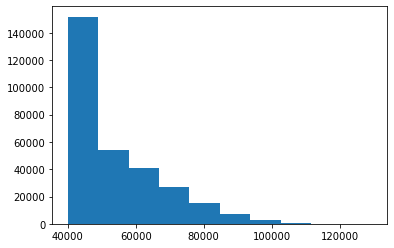

In [25]:
plt.hist(salary_data)
plt.show()

In [30]:
titles = engine.execute("SELECT titles.title, salary FROM salaries JOIN employees ON salaries.employee_number = employees.emp_no JOIN titles ON employees.emp_title_id = titles.title_id")

In [31]:
title_data = []
salary_data = []
for i in titles:
    title_data.append(i[0])
    salary_data.append(i[1])

In [32]:
title_df = pd.DataFrame()
title_df['title'] = title_data
title_df['salary'] = salary_data

title_df

,title,salary
0,Engineer,48973
1,Senior Engineer,40000
2,Technique Leader,43548
3,Staff,63377
4,Senior Engineer,40000
...,...,...
300019,Staff,40000
300020,Technique Leader,40000
300021,Senior Engineer,59703
300022,Senior Engineer,48038
